In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/ML/Praktikum/praktikum 12/data/Wine dataset.csv')

In [7]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # untuk 3d plot
# agar plot tampil rapi
plt.rcParams['figure.figsize'] = (8, 6)

In [8]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [10]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
print("Nama kelas:", wine.target_names)
df['target'].value_counts()

Nama kelas: ['class_0' 'class_1' 'class_2']


,count
target,
1,71
0,59
2,48


In [13]:
X = wine.data
y = wine.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (178, 13)
Shape of y: (178,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (142, 13)
Shape of X_test: (36, 13)


In [15]:
sclaer = StandardScaler()

X_train_scaled = sclaer.fit_transform(X_train)
X_test_scaled = sclaer.transform(X_test)

X_train_scaled[:5]

array([[ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474],
       [ 0.94851892, -0.76544542,  1.25317383,  0.85328406,  0.09178497,
         1.17279546,  1.33318146, -0.59045701,  1.34974202,  0.30530313,
         1.06715537,  0.15104809,  1.81576773],
       [ 0.52335419, -0.51940939,  0.9540342 , -1.04643312, -0.44567755,
         0.93057163,  1.006382  , -0.1695489 , -0.26000178, -0.081509  ,
        -0.12834302,  0.89317174,  1.51620262],
       [ 0.97352861, -0.55585917,  0.16879269, -1.0761162 , -0.71440882,
         0.52686525,  0.81662747, -0.59045701,  0.36312485,  0.262324  ,
         0.8900445 ,  0.42752553,  1.93226527],
       [ 0.43582027,  0.82012009,  0.05661533,  0.55645325, -0.51286037,
        -0.55506784, -1.29175618,  0.75644894, -0.60618325,  1.47433535,
        -1.76661859, -1.43505932, -0.29783054]])

In [17]:
# model svm tanpa pca
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# prediksi dan evaluasi
y_pred_svm_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_svm_no_pca)
print("Akurasi tanpa PCA:", acc_no_pca)

print("\nClassification Report (SVM tanpa PCA):")
print(classification_report(y_test, y_pred_svm_no_pca, target_names=wine.target_names))

Akurasi tanpa PCA: 0.9722222222222222

Classification Report (SVM tanpa PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [18]:
# pca dengan 3 komponen utama
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

Shape of X_train_pca: (142, 3)
Shape of X_test_pca: (36, 3)


In [20]:
# variasi yang dijelaskan oleh tiap komponen
explained_variance = pca.explained_variance_ratio_
print("Varians yang dijelaskan oleh tiap komponen:", explained_variance)
print("Total variansi yang dijelaskan 3 komponen pertama", explained_variance.sum())

Varians yang dijelaskan oleh tiap komponen: [0.35792104 0.19270671 0.11019835]
Total variansi yang dijelaskan 3 komponen pertama 0.6608261082211259


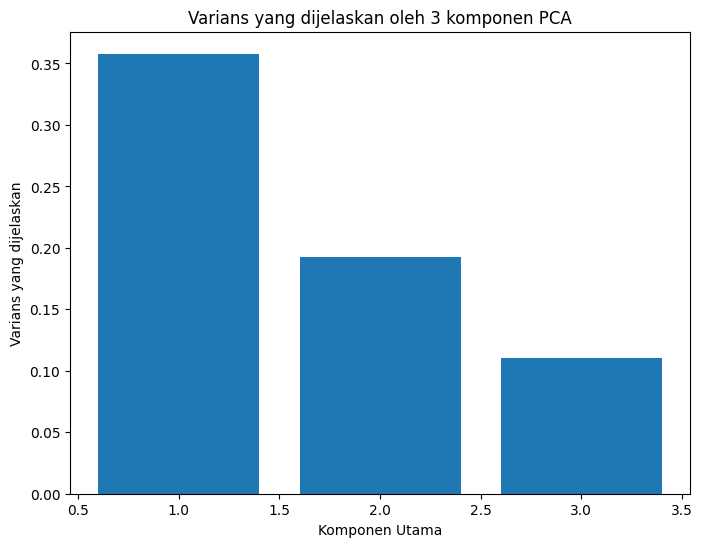

In [21]:
plt.bar([1, 2, 3], explained_variance)
plt.xlabel('Komponen Utama')
plt.ylabel('Varians yang dijelaskan')
plt.title('Varians yang dijelaskan oleh 3 komponen PCA')
plt.show()

In [22]:
# model svm dengan pca
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# prediki dan evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (3 komponen):", acc_pca)

print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))

Akurasi SVM dengan PCA (3 komponen): 0.9722222222222222

Classification Report (dengan PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



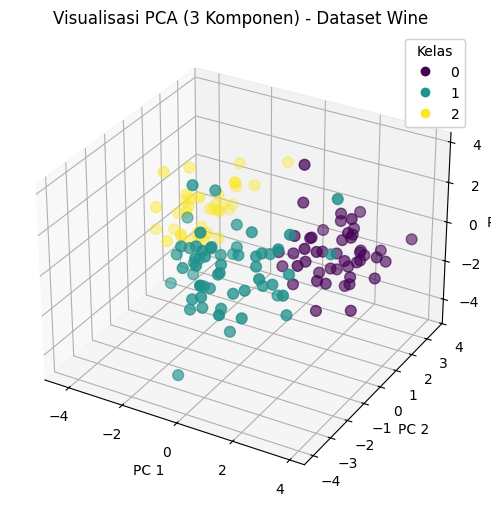

In [24]:
# visualisasi 3d pca (menggunakan data train)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Wine')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# tambahkan legend berdasarkkan kelas
legend = ax.legend(
    *scatter.legend_elements(),
    title="Kelas"
)
ax.add_artist(legend)

plt.show()

In [29]:
# membandingkan hasil model tanpa dan dengan PCA
comparison = pd.DataFrame({
    'Model': ['SVM tanpa PCA', 'SVM dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [X_train.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variasi Total PCA': [None, explained_variance.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variasi Total PCA
0,SVM tanpa PCA,13,0.972222,NaN
1,SVM dengan PCA (3 Komponen),3,0.972222,0.660826


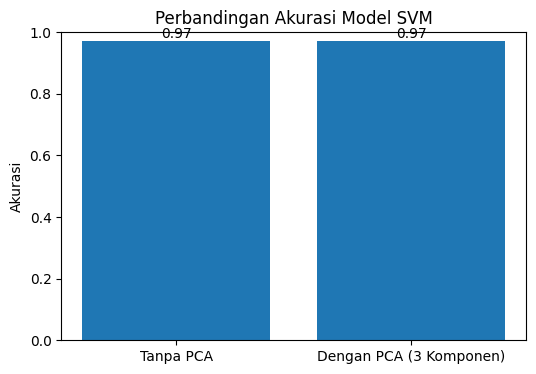

In [30]:
plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

 Praktikum ini telah dilakukan penerapan Principal Component Analysis (PCA) sebagai salah satu
teknik reduksi dimensi untuk menyederhanakan dataset tanpa mengurangi informasi penting secara
signifikan. PCA diimplementasikan pada dataset Sirup, yang awalnya memiliki 13 fitur numerik dan 3
kelas target (jenis Sirup berbeda).
Dari seluruh tahapan yang dilakukan, diperoleh beberapa kesimpulan utama sebagai berikut:
1. Proses reduksi dimensi dengan PCA berhasil mengubah 13 fitur asli menjadi 3 komponen utama
(PC1, PC2, dan PC3). Ketiga komponen tersebut mampu menjelaskan sekitar 66.08% variansi total
dari data asli, yang berarti sebagian besar informasi masih dapat dipertahankan.
2. Model SVM tanpa PCA dan model SVM dengan PCA (3 komponen) menunjukkan akurasi yang
sama tinggi, yaitu 97.22%. Hal ini membuktikan bahwa penerapan PCA tidak menurunkan
performa klasifikasi meskipun jumlah fitur berkurang drastis.
3. Visualisasi 3D PCA menunjukkan bahwa data dari tiga kelas (class_0, class_1, dan class_2) dapat
terpisah dengan cukup baik pada ruang tiga dimensi hasil transformasi PCA, menandakan bahwa
komponen utama berhasil menangkap struktur data yang relevan.
4. Dengan menerapkan PCA, model menjadi lebih efisien secara komputasi, karena bekerja dengan
jumlah fitur yang lebih sedikit, namun tetap mempertahankan kinerja prediksi yang sangat baik.
5. PCA juga membantu mengurangi risiko overfitting, terutama pada dataset dengan dimen